# **US Accidents EDA**
Apply Exploratory Data Analysis for a countrywide traffic accident dataset from kaggle called [US accidents](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents) 

## **Environment setup**
Before we dive deep into project steps we will setup our environment by the following steps :
* Install required packages
* Download the dataset

##### **Install required packages**

In [6]:
!pip install -q -r "requirements.txt"

##### **Download the dataset**
We will use [opendatasets](https://github.com/JovianML/opendatasets) from JovianML to download the dataset from kaggle  
**Hint:** Use instruction provided [here](https://github.com/JovianML/opendatasets) for getting kaggle username and key


In [7]:
import opendatasets as od
od.download('https://www.kaggle.com/sobhanmoosavi/us-accidents')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omarelsherif
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 141MB/s]


## **The Data**
We will go through all steps for successfully applying EDA for the dataset as following :- 
1. Data Loading
2. Data Cleaning
3. EDA

In [58]:
# Import needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from folium.plugins import HeatMap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **1. Data Loading**
Load the dataset and show its information and features statistics

In [9]:
# Load the dataset
dataset = pd.read_csv("/content/us-accidents/US_Accidents_Dec21_updated.csv")

In [10]:
# Show dataset head
dataset.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [11]:
# Dataset shape
dataset.shape

(2845342, 47)

**NOTE:** The dataset has **47** features and **2.8 million** records

In [12]:
# Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

**NOTE :** The dataset contain **47** features with types as followings :- 
* Numerical : 14 ( float:13 , int:1 )
* Cartegorical : 33 ( string:20 , bool:13 )

In [13]:
# Dataset statistics
dataset.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


### **2. Data Cleaning**
Handling missing values

In [14]:
# Missing values per column
missing = dataset.isna().sum().sort_values(ascending=False)
missing

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

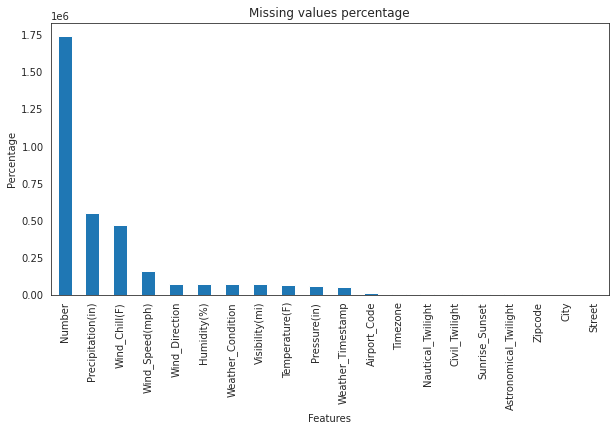

In [15]:
# Visualize percentage of missing values
missing[missing != 0].plot(kind='bar',
                            title="Missing values percentage",
                            xlabel="Features",
                            ylabel="Percentage",
                            figsize=(10,5))

In [18]:
# fill missing values
dataset.fillna(method="ffill", inplace=True)

In [19]:
# Show missing values count again
dataset.isna().sum().sort_values(ascending=False)

Number                   14
ID                        0
No_Exit                   0
Wind_Direction            0
Wind_Speed(mph)           0
Precipitation(in)         0
Weather_Condition         0
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
Railway                   0
Pressure(in)              0
Roundabout                0
Station                   0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset            0
Civil_Twilight            0
Nautical_Twilight         0
Visibility(mi)            0
Humidity(%)               0
Severity                  0
Wind_Chill(F)             0
Start_Time                0
End_Time                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
Description               0
Street              

### **3. EDA**
Columns we'll analyze:  
* City
* Start Time
* Start Lat, Start Lng

#### **City**

In [21]:
# Show city values
dataset["City"]

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [23]:
# Feature unique values count
len(dataset["City"].unique())

11681

**NOTE:** So `City` feature has **11681** unique value, let's show the count of every unique value

In [26]:
# Count of every unique value
cities_by_accident = dataset["City"].value_counts()
cities_by_accident

Miami                           106969
Los Angeles                      68958
Orlando                          54696
Dallas                           41980
Houston                          39451
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

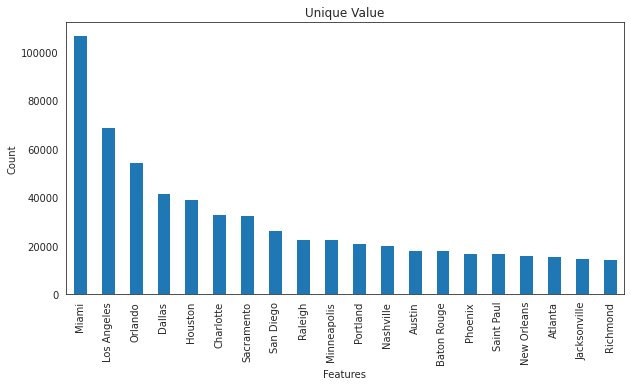

In [32]:
# Visualize count of top 20 unique values
cities_by_accident[0:20].plot(kind='bar',
                              title="Unique Value",
                              xlabel="Features",
                              ylabel="Count",
                              figsize=(10,5))

**CONCLUSION:**
* `Miami` city has the most value for accident

#### **Start Time**

In [33]:
# Show start time values
dataset["Start_Time"]

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [35]:
# Convert to datetime
dataset.Start_Time = pd.to_datetime(dataset.Start_Time)

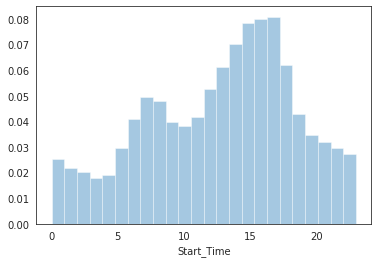

In [39]:
# Visualize start time by hour
sns.distplot(dataset.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

**CONCLUSIONS:**   
* A high percentage of accidents occur between 6am to 10am
* Next higest percentage is 3 pm to 6 pm.

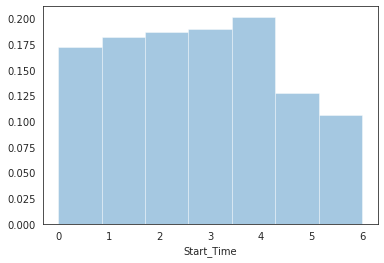

In [44]:
# Visualize start time by days 
sns.distplot(dataset.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

#### **Start Latitude & Longitude**

In [49]:
# Show strat latitude values
dataset["Start_Lat"]

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [51]:
# Show strat longitude values
dataset["Start_Lng"]

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

In [53]:
# Take sample of the dataset
sample = dataset.sample(int(0.1 * len(dataset)))
sample

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
27093,A-27094,2,2016-08-31 13:25:16,2016-08-31 19:25:16,39.105925,-94.728330,39.105806,-94.724935,0.182,At 57th St/Exit 417 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
263758,A-263759,2,2021-09-26 00:00:15,2021-09-26 01:27:16,38.903111,-77.024609,38.903583,-77.025982,0.081,Incident on MASSACHUSETTS AVE near MASSACHUSET...,...,False,False,False,False,False,False,Night,Night,Night,Night
2832208,A-2832209,3,2019-07-26 13:13:59,2019-07-26 13:42:14,26.778160,-80.098500,26.788270,-80.098790,0.699,At Blue Heron Blvd/Exit 76 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
614418,A-614419,2,2021-08-20 14:00:27,2021-08-20 14:20:27,25.686920,-80.416652,25.685286,-80.415632,0.130,Slow traffic on FL-825 - FL-94 from SW 86th St...,...,False,False,False,False,False,False,Day,Day,Day,Day
624947,A-624948,2,2021-12-17 17:38:52,2021-12-17 18:07:33,32.897750,-117.116060,32.906463,-117.116101,0.602,Stationary traffic on I-15 N - Escondido Fwy N...,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778892,A-1778893,2,2020-12-30 11:59:30,2020-12-31 04:29:30,38.746129,-77.522953,38.754669,-77.527993,0.650,Stationary traffic on VA-234 Byp from VA-28/No...,...,False,False,False,False,False,False,Day,Day,Day,Day
2320607,A-2320608,2,2020-01-29 14:23:00,2020-01-29 14:57:29,36.964086,-121.992406,36.964086,-121.992406,0.000,At 7th Ave - Accident.,...,False,True,True,False,False,False,Day,Day,Day,Day
2391550,A-2391551,2,2019-12-14 12:50:03,2019-12-14 16:50:03,45.371920,-122.744810,45.371920,-122.744810,0.000,At I-5 (South) - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2697630,A-2697631,2,2018-01-02 12:19:07,2018-01-02 18:19:07,33.880430,-118.103880,33.878950,-118.103840,0.102,Ramp to CA-91 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


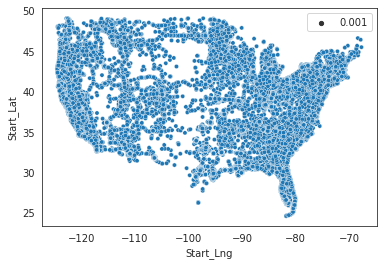

In [54]:
# Visualize sample of start lat vs start long
sns.scatterplot(x=sample.Start_Lng, y=sample.Start_Lat, size=0.001)

In [57]:
# Show example of lat and long 
lat, lon = dataset.Start_Lat[0], dataset.Start_Lng[0]
lat, lon

(40.10891, -83.09286)

In [60]:
# Get lat long pairs within sample dataset
sample = dataset.sample(int(0.001 * len(dataset)))
lat_lon_pairs = list(zip(list(sample.Start_Lat), list(sample.Start_Lng)))

In [61]:
# Show the map
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map